<a href="https://colab.research.google.com/github/Elbam/Data-Science-Games/blob/main/Analisis_Data_Poll_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
''' Intalar librerias Importar modulos '''
!pip install -q praw
import praw

In [2]:
!pip install rapidfuzz -t /usr/local/lib/python3.7/dist-packages/IPython/extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rapidfuzz-2.12.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)


In [3]:
import re

In [4]:
from rapidfuzz import fuzz

In [5]:
import csv

In [6]:
!pip install stylecloud -t /usr/local/lib/python3.7/dist-packages/IPython/extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached stylecloud-0.5.2-py3-none-any.whl
  Using cached fire-0.4.0-py2.py3-none-any.whl
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached wordcloud-1.8.2.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
  Using cached icon_font_to_png-0.4.1-py2.py3-none-any.whl (161 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached tinycss-0.4-py3-none-any.whl
  Using cached Pillow-9.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 k

In [18]:
import stylecloud
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [8]:
'''  OBTENER DATA    '''
reddit = praw.Reddit(client_id='ss5W2ak8e8Wn9cwNqvvHiw',
                     client_secret='SGUuTnHUQqufpQ4oQqEK76b_fDgr5Q',
                     user_agent='my_extractor',check_for_async=False)

In [9]:
url='https://www.reddit.com/r/booksuggestions/comments/nsm98m/good_murder_mysteries_that_really_draw_you_in/'
comentarios=reddit.submission(url=url)
comentarios.comments.replace_more(limit=None)

[]

In [10]:
comentario_detalle=((2019,'cib77j'),(2021,'m20rd1'))

for año,comenta_id in comentario_detalle:
  comentarios=reddit.submission(id=comenta_id)
  comentarios.comments.replace_more(limit=None)

  op_archivo = f'top_comments_{año}.txt'
  with open (op_archivo, 'w') as f:
    for top_level_comment in comentarios.comments:
      f.write(top_level_comment.body + '\n')
      """print(top_level_comment.body + '\n') """

In [ ]:
"""     LIMPIAR DATA  y Estraer Nombres de Autores """ 

In [11]:
ip_comentarios=(f'top_comments_2019.txt',f'top_comments_2021.txt')
ip_autores=(f'authors2019.txt',f'authors2021.txt')

In [ ]:
""" extraer nombre del autor  por año """
""" se almacena los patrones en una tupla """
''' se crea un histrograma de autor (autores)

In [12]:
patrones = (r'.*\s(?:[–-]|by)\s+(.+)',
r'.*\s\\[–-]\s+(.+)',
r'.*\s\*by\s+(.+)',
r'.*[,-]\s+(.+)')


In [13]:
for ip_comenta,ip_autor in zip (ip_comentarios, ip_autores):
  with open (ip_comenta, 'r') as f, open (ip_autor, 'w') as autor:
    for linea in f:
      if re.fullmatch(r'\s+', linea):
        continue
      for pat in patrones:
        if re.search(pat, linea, flags=re.I):
          m = re.search(pat, linea, flags=re.I)
          autor.write(m[1].strip('*\t ') + '\n')
          break

In [ ]:
""" fuzzed autores """
        

In [14]:
op_entradatxt = (f'authors2019.txt',f'authors2021.txt')
op_salidacsv = (f'authors2019.csv',f'authors2021.csv')

In [15]:
for op_entrada,op_salida in zip (op_entradatxt, op_salidacsv):
  autores={}
  with open (op_entrada, 'r') as ent, open (op_salida, 'w') as sal:
    for linea in ent:
         nombrea=linea.rstrip('\n')  
         autores[nombrea]=autores.get(nombrea, 0) + 1 

    fuzzed={}
    for k in sorted(autores,key=lambda k1: -autores[k1]):
      """print(k)"""
      s1= k.lower().replace('.', '')
      """print(s1)"""
      for k2 in fuzzed :
        s2=k2.lower().replace('.', '')
        """print(s2) """
        if round(fuzz.ratio(s1,s2))>= 90:
          """print(s2)  """    
          fuzzed[k2] += autores[k]
          break
      else:
        fuzzed[k] = autores[k]     

    sal.write(f'autores,votos\n')
    for nombre in sorted(fuzzed,key=lambda k1: -fuzzed[k1]):
      votos=fuzzed[nombre]
      if votos>5:
        sal.write(f'{nombre},{votos}\n')



In [ ]:
""" preparar salida"""


In [16]:
ar_entradacsv = (f'authors2019.csv',f'authors2021.csv')
ar_salidapng= (f'topauthor2019.png',f'topauthor.png')

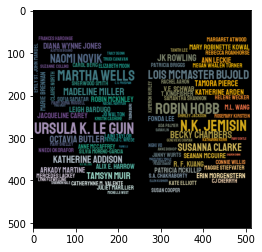

In [22]:
for entradacsv, salidapng in zip (ar_entradacsv, ar_salidapng):
  plot =stylecloud.gen_stylecloud(file_path=entradacsv,
                            icon_name='fas fa-book-open',
                            background_color='black',
                            gradient='horizontal')
  im = Image.open('stylecloud.png')
  plt.imshow(im)

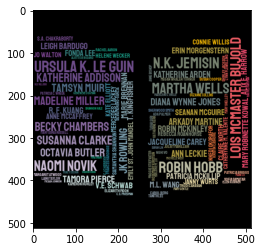